In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

X_0 = X[y == 0]
X_1 = X[y == 1]

In [19]:
bins = [0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12, 13.5, 15]

hist_0, bin_edges = np.histogram(X_0, bins=bins)
hist_1, _ = np.histogram(X_1, bins=bins)

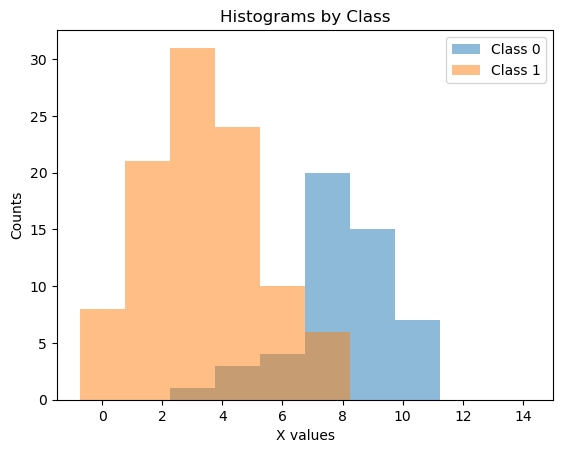

In [21]:
# Hist 0
plt.bar(bin_edges[:-1], hist_0, width=1.5, alpha=0.5, label='Class 0')

# Hist 1
plt.bar(bin_edges[:-1], hist_1, width=1.5, alpha=0.5, label='Class 1')

plt.xlabel('X values')
plt.ylabel('Counts')
plt.title('Histograms by Class')
plt.legend()
plt.show()

In [27]:
# Index where X = 6.271
idx = 4

count_Y1 = hist_1[idx]
count_total = hist_0[idx] + hist_1[idx]

prob_Y1_given_X = count_Y1 / count_total

print(prob_Y1_given_X)

0.7142857142857143


In [42]:
P_Y1 = np.mean(y == 1)
print("Class 1 prior: {}".format(P_Y1)) # Class 1 prior

# Bin width
bin_width, total_samples = 1.5, len(X)

# Normalized histograms (densities)
density_X = (hist_0 + hist_1) / (total_samples * bin_width)
density_X_given_Y1 = hist_1 / (np.sum(hist_1) * bin_width)

p_X_6271 = density_X[4]
print("p(X=6.271): {}".format(p_X_6271)) # P(X=6.271)

p_X_given_Y1_6271 = density_X_given_Y1[4]
print("P(X=6.271|Y=1): {}".format(p_X_given_Y1_6271)) # P(X=6.271|Y=1)

P_Y1_given_X_6271_Bayes = (p_X_given_Y1_6271 * P_Y1) / p_X_6271 
print("P(Y=1|X=6.271) with Bayes: {}".format(P_Y1_given_X_6271_Bayes)) # P(Y=1|X=6.271) with Bayes

Class 1 prior: 0.6666666666666666
p(X=6.271): 0.06222222222222222
P(X=6.271|Y=1): 0.06666666666666667
P(Y=1|X=6.271) with Bayes: 0.7142857142857142


In [46]:
# Density for all X values given Y = 0
density_X_given_Y0 = hist_0 / (np.sum(hist_0) * bin_width)

# Using the bayes classifier 
pred_Y1_idx = density_X_given_Y1 > density_X_given_Y0

pred_bins = bin_edges[:-1][pred_Y1_idx]

print("Predicted bins: {}".format(pred_bins)) # Predicted bins

Predicted bins: [0.  1.5 3.  4.5 6. ]
